# Image Search

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




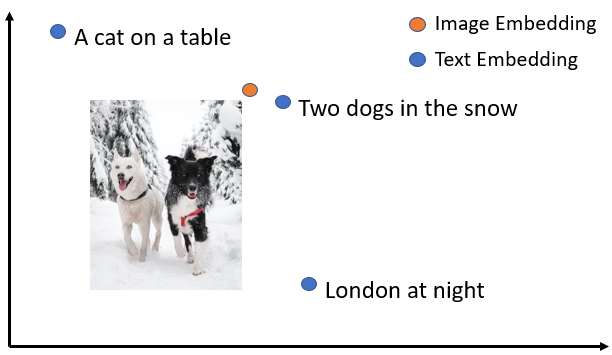

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch 
import os

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [ ]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

In [ ]:
img_names[0]

In [ ]:
# a = Image.open(img_names[0])
# a

In [ ]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

In [ ]:
img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

In [ ]:
search('man on the mountain')

In [ ]:
search('fire')

In [ ]:
# img_names[794]
print("Original Image")
timg = Image.open(img_names[1756]) #1232
plt.figure()
plt.imshow(timg)
plt.show()
print("\nSearch Results")
search(Image.open(img_names[1756])) #1756